<a href="https://colab.research.google.com/github/AkankshaB123/forecasting/blob/main/trend_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib statsmodels scipy

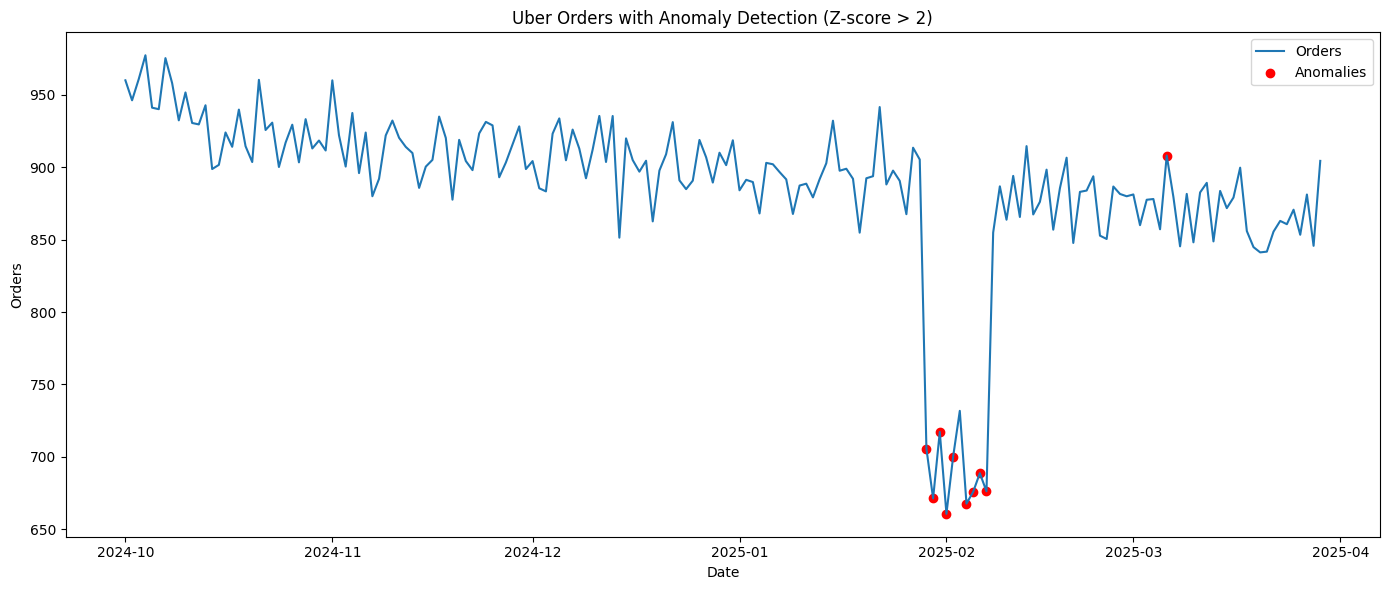

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from scipy.stats import zscore

# Step 1: Simulate daily Uber order data
np.random.seed(42)
days = pd.date_range(start="2024-10-01", periods=180, freq='D')
base_orders = 1000 + 50 * np.sin(2 * np.pi * days.dayofyear / 365)  # seasonality
trend = np.linspace(0, -200, 180)  # gradual decline
noise = np.random.normal(0, 20, 180)
orders = np.array(base_orders + trend + noise)

# Inject sudden drop (anomaly)
orders[120:130] -= 200  # simulate bug or competitor shock

# Step 2: Create DataFrame
df = pd.DataFrame({'date': days, 'orders': orders})
df.set_index('date', inplace=True)

# Step 3: STL decomposition
stl = STL(df['orders'], period=30)
result = stl.fit()

# Step 4: Anomaly detection using Z-scores
residuals = result.resid
z_scores = zscore(residuals)
anomalies = np.abs(z_scores) > 2  # threshold

# Step 5: Plot results
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['orders'], label='Orders')
plt.scatter(df.index[anomalies], df['orders'][anomalies], color='red', label='Anomalies')
plt.title('Uber Orders with Anomaly Detection (Z-score > 2)')
plt.xlabel('Date')
plt.ylabel('Orders')
plt.legend()
plt.tight_layout()
plt.show()